# Word Embeddings

## Environment Setup

You may need to install the gensim package. 

pip install gensim
or
pip3 install gensim

## Load Pre-trained Word Embeddings

Load the pre-trained FastText word embedding provided by Facebook. https://fasttext.cc/docs/en/english-vectors.html

Chinese 
https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.zh.300.vec.gz

The attached version only contains top 5000 words. 

In [17]:
%matplotlib inline

from gensim.models import KeyedVectors
w2v = KeyedVectors.load_word2vec_format("wiki.en.5k.vec", binary=False)
print("Number of words: %d" % len(w2v.vocab))

Number of words: 5000


## Word Similarity

In [4]:
print(w2v["fast"].shape)

(300,)


In [5]:
print(w2v["taiwan"])

[ 9.6523e-03  2.9594e-01  8.7192e-02  1.4251e-02 -6.2758e-01  1.4494e-01
 -3.1512e-04 -4.3654e-01 -1.4803e-01 -3.5733e-01 -2.8666e-01 -1.9130e-01
  9.8917e-02 -2.0994e-01  2.0118e-01 -2.8731e-01  1.0561e-01 -4.0479e-03
  5.5040e-01  1.7419e-01 -1.5684e-01  2.4033e-01  1.0947e-01 -1.7691e-02
 -2.8782e-01  5.1930e-01  2.8683e-01  5.9717e-02 -1.8463e-01 -3.3210e-01
 -3.2824e-01  2.1625e-01 -1.5339e-01  6.8707e-01 -4.2779e-01  1.6954e-01
  1.2408e-01 -3.6369e-01  4.0434e-01  4.6514e-01 -6.4378e-01 -2.6312e-01
  1.8545e-01  1.6788e-01  1.3870e-01  6.9593e-02 -7.0434e-02 -4.8797e-02
 -1.1680e-01 -2.6751e-01  2.0893e-01 -3.1818e-01 -1.1809e-01 -7.2132e-02
 -4.1897e-01  1.0179e-01 -7.4415e-03  3.5534e-01  7.0169e-02  2.5135e-01
  1.2294e-01 -9.1569e-02 -4.0842e-02 -2.3755e-01  5.4077e-02 -2.4699e-01
 -3.5040e-01 -2.5217e-01  1.2314e-01  3.9869e-02  2.5982e-02 -2.6672e-01
  6.1487e-02  5.2644e-02 -3.6487e-01  4.8748e-01  5.0030e-01  3.7484e-01
  7.6510e-02  1.4107e-01 -1.2549e-01 -3.0338e-02  3

In [6]:
print(w2v["taipei"])

KeyError: "word 'taipei' not in vocabulary"

In [7]:
print(w2v.similarity("nice", "good"))
print(w2v.similarity("nice", "bad"))
print(w2v.similarity("nice", "fast"))

print(w2v.similarity("good", "bad"))


print(w2v.similarity("red", "sky"))
print(w2v.similarity("yellow", "sky"))
print(w2v.similarity("blue", "sky"))

print(w2v.similarity("tiger", "lion"))
print(w2v.similarity("tiger", "bird"))

print(w2v.similarity("france", "paris"))
print(w2v.similarity("italy", "paris"))
print(w2v.similarity("italy", "rome"))
print(w2v.similarity("paris", "rome"))
print(w2v.similarity("good", "paris"))

0.60910374
0.45045793
0.27487028
0.67041725
0.33816254
0.3600589
0.46580055
0.52325076
0.30507404
0.6153761
0.3688634
0.6424498
0.53335226
0.09129018


Most similar words

In [8]:
print(w2v.most_similar("good"))
print(w2v.most_similar("paris"))
print(w2v.most_similar("tiger"))
print(w2v.most_similar("dog"))
print(w2v.most_similar("right"))

[('excellent', 0.7223856449127197), ('bad', 0.670417308807373), ('nice', 0.6091036796569824), ('better', 0.5967727303504944), ('perfect', 0.5752175450325012), ('reasonable', 0.5712679028511047), ('faith', 0.5607122778892517), ('helpful', 0.5578593611717224), ('poor', 0.5506518483161926), ('definitely', 0.5472526550292969)]
[('france', 0.6153761148452759), ('vienna', 0.5634822845458984), ('berlin', 0.5617252588272095), ('london', 0.5515710115432739), ('munich', 0.5390844345092773), ('rome', 0.5333521366119385), ('madrid', 0.526411235332489), ('moscow', 0.5238058567047119), ('prague', 0.5211637020111084), ('french', 0.5190050601959229)]
[('tigers', 0.598285436630249), ('cats', 0.5247116088867188), ('lion', 0.5232506990432739), ('lions', 0.49344366788864136), ('hamilton', 0.46046364307403564), ('dragon', 0.4476792514324188), ('cat', 0.43086451292037964), ('woods', 0.43060773611068726), ('bear', 0.4008936882019043), ('wolf', 0.3999537229537964)]
[('dogs', 0.8104336857795715), ('cat', 0.638

### Analogy

In [9]:
#  France : Paris = Italy : ?
#  Pairs - France + Italy
print(w2v.most_similar_cosmul(["paris", "italy"], ["france"]))

#  UK : London = France : ?
print(w2v.most_similar_cosmul(["london", "france"], ["uk"]))

#  Male : King = Female :？
print(w2v.most_similar_cosmul(["king", "female"], ["male"]))

#  Black : Coffee  = Red : ?
print(w2v.most_similar_cosmul(["coffee", "red"], ["black"]))

#  Wing : Aircraft = Wheel : ?
print(w2v.most_similar_cosmul(["aircraft", "wheel"], ["wing"]))

#  Microsoft : Google = Bad : ?
print(w2v.most_similar_cosmul(["google", "bad"], ["microsoft"]))

#  Microsoft : Google = Good : ?
print(w2v.most_similar_cosmul(["google", "good"], ["microsoft"]))


[('rome', 0.9118089079856873), ('milan', 0.8868755102157593), ('vienna', 0.8417394757270813), ('venice', 0.8385934829711914), ('florence', 0.8238525986671448), ('munich', 0.8000103831291199), ('prague', 0.7927053570747375), ('italian', 0.784573495388031), ('madrid', 0.7796933054924011), ('athens', 0.779522180557251)]
[('paris', 1.0550767183303833), ('rome', 0.8601745367050171), ('munich', 0.8483597636222839), ('amsterdam', 0.8383407592773438), ('berlin', 0.8285968899726868), ('venice', 0.8250126242637634), ('french', 0.816684365272522), ('barcelona', 0.8140461444854736), ('england', 0.8124414086341858), ('vienna', 0.8115441799163818)]
[('queen', 0.8924742341041565), ('princess', 0.8137581944465637), ('kings', 0.8062561750411987), ('reign', 0.7818456888198853), ('kingdom', 0.7693678736686707), ('throne', 0.7536834478378296), ('royal', 0.7402398586273193), ('prince', 0.7384786009788513), ('crown', 0.7332648634910583), ('elizabeth', 0.7213146090507507)]
[('tea', 0.8334957361221313), ('bee

## Simple Text Classifiction with Word Embeddings

Load the dataset

In [11]:
import nltk
from nltk.corpus import movie_reviews
from collections import Counter

nltk.download('movie_reviews')

labels = []
instances = []

pos_reviews = []
neg_reviews = []

for label in movie_reviews.categories():
    for fileid in movie_reviews.fileids(label):
        doc = movie_reviews.words(fileid)
        if label == 'pos':
            pos_reviews.append(" ".join(doc))
        else:
            neg_reviews.append(" ".join(doc))
            
train_pos_reviews = pos_reviews[:900]
train_neg_reviews = neg_reviews[:900]
test_pos_reviews = pos_reviews[900:]
test_neg_reviews = neg_reviews[900:]

print("Number of training data %d (POS) %d (NEG)" % (
    len(train_pos_reviews), len(train_neg_reviews)) )
print("Number of test data %d (POS) %d (NEG)" % (
    len(test_pos_reviews), len(test_neg_reviews)) )

[nltk_data] Downloading package movie_reviews to
[nltk_data]     /Users/stanleychu/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.


Number of training data 900 (POS) 900 (NEG)
Number of test data 100 (POS) 100 (NEG)


In [12]:
train_X = []
train_Y = []
test_X = []
test_Y = []

for x in train_pos_reviews:
    train_X.append(x)
    train_Y.append(1)
for x in train_neg_reviews:
    train_X.append(x)
    train_Y.append(0)
    
for x in test_pos_reviews:
    test_X.append(x)
    test_Y.append(1)
for x in test_neg_reviews:
    test_X.append(x)
    test_Y.append(0)

In [22]:
len(train_X[0])

4261

Rebuild the old model with one-hot features

In [29]:
from sklearn.feature_extraction.text import CountVectorizer

feature_extractor = CountVectorizer()
training_vectors = feature_extractor.fit_transform(train_X)

print(len(feature_extractor.get_feature_names()))

37987


In [23]:
training_vectors[10].shape, len(train_X)

((1, 37987), 1800)

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

test_vectors = feature_extractor.transform(test_X)

clf = LogisticRegression()
clf = clf.fit(training_vectors, train_Y)

pred_Y = clf.predict(test_vectors)

accuracy = accuracy_score(test_Y, pred_Y)
precision = precision_score(test_Y, pred_Y, average='macro')
recall = recall_score(test_Y, pred_Y, average='macro')
fscore = f1_score(test_Y, pred_Y, average='macro')

print("Accuracy: %g\tPrecision: %g\tRecall: %g\tF-score: %g" % (
    accuracy, precision, recall, fscore))

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy: 0.85	Precision: 0.850561	Recall: 0.85	F-score: 0.84994


### Represent the features with word embeddings

In [57]:
import numpy

training_vectors = []
test_vectors = []
for x in train_X:
    vec = numpy.zeros(300)   # Create a zero vector of dimension 300 
    cnt = 0
    for w in x:
        w = w.lower()
        if w in w2v.vocab:
            vec += w2v[w]
            cnt += 1
    training_vectors.append(vec / cnt)  # Normalize
    
for x in test_X:
    vec = numpy.zeros(300)   # Create a zero vector of dimension 300 
    cnt = 0
    for w in x:
        w = w.lower()
        if w in w2v.vocab:
            vec += w2v[w]
            cnt += 1
    test_vectors.append(vec / cnt)  # Normalize    

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

clf = LogisticRegression()

clf = clf.fit(training_vectors, train_Y)

pred_Y = clf.predict(test_vectors)

accuracy = accuracy_score(test_Y, pred_Y)
precision = precision_score(test_Y, pred_Y, average='macro')
recall = recall_score(test_Y, pred_Y, average='macro')
fscore = f1_score(test_Y, pred_Y, average='macro')

print("Accuracy: %g\tPrecision: %g\tRecall: %g\tF-score: %g" % (
    accuracy, precision, recall, fscore))

Accuracy: 0.63	Precision: 0.630052	Recall: 0.63	F-score: 0.629963


In [59]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=50)

clf = clf.fit(training_vectors, train_Y)

pred_Y = clf.predict(test_vectors)

accuracy = accuracy_score(test_Y, pred_Y)
precision = precision_score(test_Y, pred_Y, average='macro')
recall = recall_score(test_Y, pred_Y, average='macro')
fscore = f1_score(test_Y, pred_Y, average='macro')

print("Accuracy: %g\tPrecision: %g\tRecall: %g\tF-score: %g" % (
    accuracy, precision, recall, fscore))

Accuracy: 0.66	Precision: 0.665358	Recall: 0.66	F-score: 0.657224


## Train Your Own Word Embeddings

Load a corpus. 

In [44]:
with open("wealth_of_nations.txt", encoding="utf8") as fin:
    text = fin.read()
print("Number of characters: %d" % len(text))

Number of characters: 2221405


In [45]:
text[0:100]

'\ufeffAN INQUIRY INTO THE NATURE AND CAUSES OF THE WEALTH OF NATIONS.\n\n\nBy Adam Smith\n\n\n\n\nINTRODUCTION AN'

## Preprocessing

### Sentence Tokenization

In [46]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from nltk.tokenize import sent_tokenize

sents = sent_tokenize(text)
print("Number of sentences: %d" % len(sents))

print(sents[0])
print(sents[1])

print(sents[:2])

print(sents[100])

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/stanleychu/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/stanleychu/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


Number of sentences: 11914
﻿AN INQUIRY INTO THE NATURE AND CAUSES OF THE WEALTH OF NATIONS.
By Adam Smith




INTRODUCTION AND PLAN OF THE WORK.
['\ufeffAN INQUIRY INTO THE NATURE AND CAUSES OF THE WEALTH OF NATIONS.', 'By Adam Smith\n\n\n\n\nINTRODUCTION AND PLAN OF THE WORK.']
Each individual becomes
more expert in his own peculiar branch, more work is done upon the
whole, and the quantity of science is considerably increased by it.


### Word Tokenization

In [47]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
    
stopword_list = stopwords.words('english')

from nltk.tokenize import word_tokenize

sent_tokens = []
for sent in sents:
    sent_tokens.append(word_tokenize(sent.lower()))

print(sent_tokens[0])
print(sent_tokens[1])
print(sent_tokens[100])


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/stanleychu/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['\ufeffan', 'inquiry', 'into', 'the', 'nature', 'and', 'causes', 'of', 'the', 'wealth', 'of', 'nations', '.']
['by', 'adam', 'smith', 'introduction', 'and', 'plan', 'of', 'the', 'work', '.']
['each', 'individual', 'becomes', 'more', 'expert', 'in', 'his', 'own', 'peculiar', 'branch', ',', 'more', 'work', 'is', 'done', 'upon', 'the', 'whole', ',', 'and', 'the', 'quantity', 'of', 'science', 'is', 'considerably', 'increased', 'by', 'it', '.']


## Train Word2Vec

In [ ]:
from gensim.models import Word2Vec
model = Word2Vec(sent_tokens, min_count=5, size=100, sg=1, hs=1, 
                 negative=5, iter=10)
model = model.wv

/usr/local/lib/python3.7/site-packages/gensim/models/base_any2vec.py:743: UserWarning: C extension not loaded, training will be slow. Install a C compiler and reinstall gensim for fast training.
  "C extension not loaded, training will be slow. "


In [ ]:
model["world"]

In [95]:
print(model["class"])
print(len(model["class"]))

[ 1.4965710e-01  8.9999783e-01 -2.7341968e-01 -5.4190171e-01
  4.6533355e-01  3.6821780e-01 -3.9926213e-01 -2.7450228e-01
  5.5360770e-01  5.7483923e-01 -5.0034893e-01 -2.8746646e-02
 -3.0945748e-01 -7.7668234e-04 -3.8674289e-01 -7.3370892e-01
 -4.8959944e-01  5.6995571e-01 -7.4154139e-02  5.6896901e-01
 -8.1946127e-02 -3.4786280e-02 -5.8615762e-01  1.7376624e-02
 -3.9412248e-01 -3.9087114e-01 -8.8845603e-02 -1.6040827e-01
  2.3968397e-02  5.6478437e-02 -1.3350949e-01  3.1514370e-01
  7.8477208e-03 -8.4895283e-02 -8.2977611e-01  2.1043907e-01
 -3.1686732e-01  1.5922801e-01 -3.8107836e-01 -1.1311939e-01
  5.2563435e-01  8.1516579e-03  3.1062093e-01  4.2961445e-01
 -3.6186624e-01 -1.9492592e-01  1.3820700e-01  2.4804936e-01
 -2.8877553e-01  3.4208536e-01  2.1558356e-01  5.7076985e-01
 -4.3200120e-01 -1.1223202e-01  3.7022939e-01  1.9982339e-01
  5.1119804e-01 -1.8932918e-01 -3.2881565e-02 -4.1473678e-01
  5.5982018e-01 -1.1138938e-01 -3.1242254e-01 -5.0720345e-02
  3.2092154e-02  3.81523

In [97]:
print("Number of words: %d" % len(model.vocab))

Number of words: 3976


## Similarity

In [98]:
print(model.most_similar("wealth"))
print(model.most_similar("nation"))
print(model.most_similar("money"))

[('riches', 0.6278215646743774), ('greatness', 0.5907753705978394), ('prosperity', 0.5893980860710144), ('population', 0.5893774032592773), ('scantiness', 0.5826501250267029), ('flourishing', 0.5545831918716431), ('declension', 0.5489140748977661), ('increase', 0.527804970741272), ('abundance', 0.5212849378585815), ('populousness', 0.5200366973876953)]
[('nations', 0.6225824356079102), ('country', 0.5454011559486389), ('civilized', 0.5419918298721313), ('barbarous', 0.4908297657966614), ('shepherds', 0.4878070652484894), ('tribe', 0.4803987741470337), ('hunters', 0.4699052572250366), ('riches', 0.4605660140514374), ('scantiness', 0.45589399337768555), ('monarchy', 0.4548380374908447)]
[('paper', 0.6036133766174316), ('holders', 0.5955257415771484), ('bank', 0.5644773244857788), ('sum', 0.5491753220558167), ('deed', 0.5359117984771729), ('currency', 0.532559871673584), ('bore', 0.5325477123260498), ('bills', 0.5316023230552673), ('assignment', 0.5233144164085388), ('credit', 0.518808841

In [99]:
print("Distance between %s and %s: %f" % ("class", "classes", model.similarity("class", "classes")))
print("Distance between %s and %s: %f" % ("country", "national", model.similarity("country", "nation")))
print("Distance between %s and %s: %f" % ("rich", "poor", model.similarity("rich", "poor")))

Distance between class and classes: 0.455223
Distance between country and national: 0.545401
Distance between rich and poor: 0.612935


In [100]:
#  Capital : Landlord = Labour : ?
print(model.most_similar_cosmul(["landlord", "labour"], ["capital"]))

[('tenant', 0.8804593682289124), ('rent', 0.8622018694877625), ('labourer', 0.8597228527069092), ('real', 0.8416550755500793), ('land', 0.8403441309928894), ('necessaries', 0.8393978476524353), ('indirectly', 0.8281274437904358), ('tending', 0.8028601408004761), ('belongs', 0.7976264357566833), ('finally', 0.7956637144088745)]


## Visualization

In [101]:
%matplotlib inline
import matplotlib.pyplot as plt

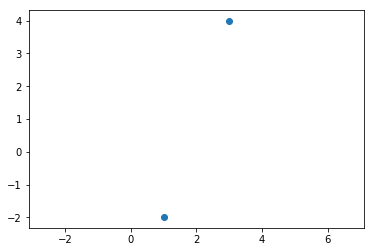

In [102]:
plt.scatter(x=[1, 3], y=[-2, 4])
plt.axis('equal');

## Principal Component Analysis

In [103]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

words = ["landlord", "labour", "labourer", "class", "rich", "money", "wealth", "farmer"]
X = []
for word in words:
    X.append(model[word])
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [104]:
points = pca.transform(X)

print(points)

[[-1.60534733  0.11767546]
 [ 0.15999342  0.33093661]
 [-1.01121981  0.03209693]
 [ 1.88218956  2.42877069]
 [ 0.97566394 -0.47851246]
 [-0.65906295 -1.07014411]
 [ 1.77839722 -2.03415467]
 [-1.52061405  0.67333156]]


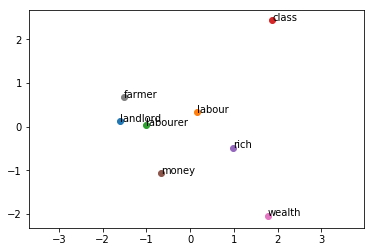

In [105]:
for i in range(len(points)):
    label = words[i]
    x = points[i][0]
    y = points[i][1]
    plt.scatter(x, y)
    plt.annotate(label, xy=(x, y))
plt.axis('equal');

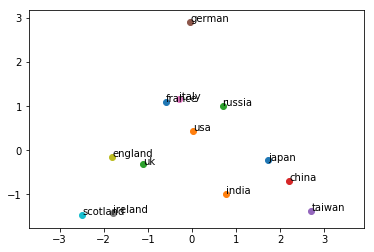

In [106]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

words = ["france", "usa", "uk", "china", "taiwan", "german", "italy", "ireland", "england", "scotland", "japan", "india", "russia"]
X = []
for word in words:
    X.append(w2v[word])
pca.fit(X)
points = pca.transform(X)

for i in range(len(points)):
    label = words[i]
    x = points[i][0]
    y = points[i][1]
    plt.scatter(x, y)
    plt.annotate(label, xy=(x, y))
plt.axis('equal');